In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'credit-risk-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F688532%2F1207035%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240229%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240229T152418Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D6d89256b69d49e17975ae60b3c2069ff527bdea1b5ff6b6d02bcd28075872f17b705af443e13d310563bf56f737ea5b32a5498ee9e8d817e1395d173aaad5d7adb04d8e922b9867eb1c3a73f7a5e6935499d17dcd8063cc29c304280f472873eab90bd57a373826c98f9f4e6971c6ed601ad6a37bab1b96b1d8ab495e77c62fc8bcb080f988f9ba994dd0feffd2aa49abc222230b092ab5ef7602f525abbd891a94c58e56e20cfd2fbc1849e333bc980dd2e99f0783a64639927d63f4cff1440266c9f4a165fe33de357bc03a5b31f2c8b6b525ca69389c1d12165b5a4a17dbb2267c43699b61940cebbbd3a103d89e262e4478c332dc4b7218ecf7e4ef8e7b9,drugs-a-b-c-x-y-for-decision-trees:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1432504%2F2371056%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240229%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240229T152418Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8ed04816216191bb2451c96b97158058b57d6113273a75f1f5b2aa504255b8c0b77e0bdc5e31eb718c4efae1d455fef5d0a79a3f1f9dde0cd3795a72cc4646fd3e93a60968d868f713ed5a3a6dae9a0364af0d7aa4bc6b3988f9e0f2bf83d6a921d6cac8370db1f0b29d06e0c1ea6b240f757cf1db720fdcda47fe6fd540f571ce16194fdc0d0dc66dd94d5cc10d45451805f62656aeab441fd098336426474015a0c332f890298bd4720d445bfca5bf75b5936055c64e5564747b7768909773d3499b4e77d345a9a54e653634005491f060e25c44f4eeeb76818538e08989d3c6d55067a8ca4cdca43828c34d006a030f6e0d69b898af88ad56989dbc85bfce'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 376518 bytes downloaded
Downloaded and uncompressed: credit-risk-dataset
[==================================================] 1716 bytes downloaded
Downloaded and uncompressed: drugs-a-b-c-x-y-for-decision-trees
Data source import complete.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# importing the classes where DT is implemented
from sklearn.tree import DecisionTreeClassifier as DTC, DecisionTreeRegressor as DTR


# You can view other sessions via
[GitHub - hossamAhmedSalah/Machine_Learning_MSP: MSP 23 workshop of machine learning](https://github.com/hossamAhmedSalah/Machine_Learning_MSP/tree/main)
![MSP Logo](https://github.com/hossamAhmedSalah/Machine_Learning_MSP/blob/main/Assets/image-removebg-preview.png?raw=true)

> you can check this notebook if you want to know How to implement a DT from scratch ! 👀
 [Decision Tree From Scratch](https://www.kaggle.com/code/fareselmenshawii/decision-tree-from-scratch)

Content List
- Validation and testing
- DT for classification and regression
- Evaluation and different types of evaluation
- Pipelines and preprocessing
- Visualisation for trees

# <span style="color : salmon">Decision Tree</span>
![image.png](attachment:image.png)

## <span style="color: Red">Drugs💊 dataset</span>
Imagine that you are a medical researcher🥼 compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. <span style="color:yellow">The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients</span>, and the target is the drug that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient.

In [3]:
# importing Drugs dataset
drugs = pd.read_csv('/kaggle/input/drugs-a-b-c-x-y-for-decision-trees/drug200.csv')
drugs

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


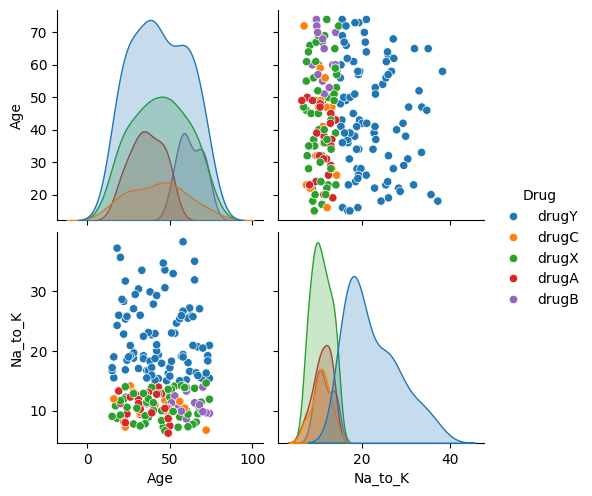

In [4]:
sns.pairplot(data=drugs, hue='Drug');

In [5]:
# let's see some info about the data
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
# let's see the categorical features
drugs.describe(include='O')

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,drugY
freq,104,77,103,91


In [7]:
# We have some categorical features let's encode them
# we can use one_hot_encodeing
# or we can use labee_encoding
# let's chooce label_encoding for this problem
from sklearn.preprocessing import LabelEncoder

# initiating the class
label_enc = LabelEncoder()

# columns that are categorical
cols = drugs.select_dtypes(include='O').columns
# looping on each column in the dataset
for col in cols:
    # Label encoding each column
    drugs[col] = label_enc.fit_transform(drugs[col])

# displaying the data after encoding
drugs

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [8]:
# dividing the data into X, y
# X: the features
# y : the target 🎯
X = drugs.drop(columns='Drug')
y = drugs['Drug']

In [9]:
# let's see our data X, y
display(X.head(3), y.head(3))

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114


0    4
1    2
2    2
Name: Drug, dtype: int64

In [10]:
# now we need to split the data into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)

In [11]:
# Building the model
tree_clf0 = DTC()
# Fitting the model
tree_clf0.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
# let's see the model score (acc) on the training set
tree_clf0.score(X_train, y_train)

1.0

In [13]:
# let's see the model score on the test set
tree_clf0.score(X_test, y_test)

1.0

In [14]:
# another way of calculating the accuracy
from sklearn.metrics import accuracy_score, classification_report
y_pred = tree_clf0.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [15]:
# third way using more than one metric
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



![image.png](attachment:image.png)

https://en.wikipedia.org/wiki/Precision_and_recall

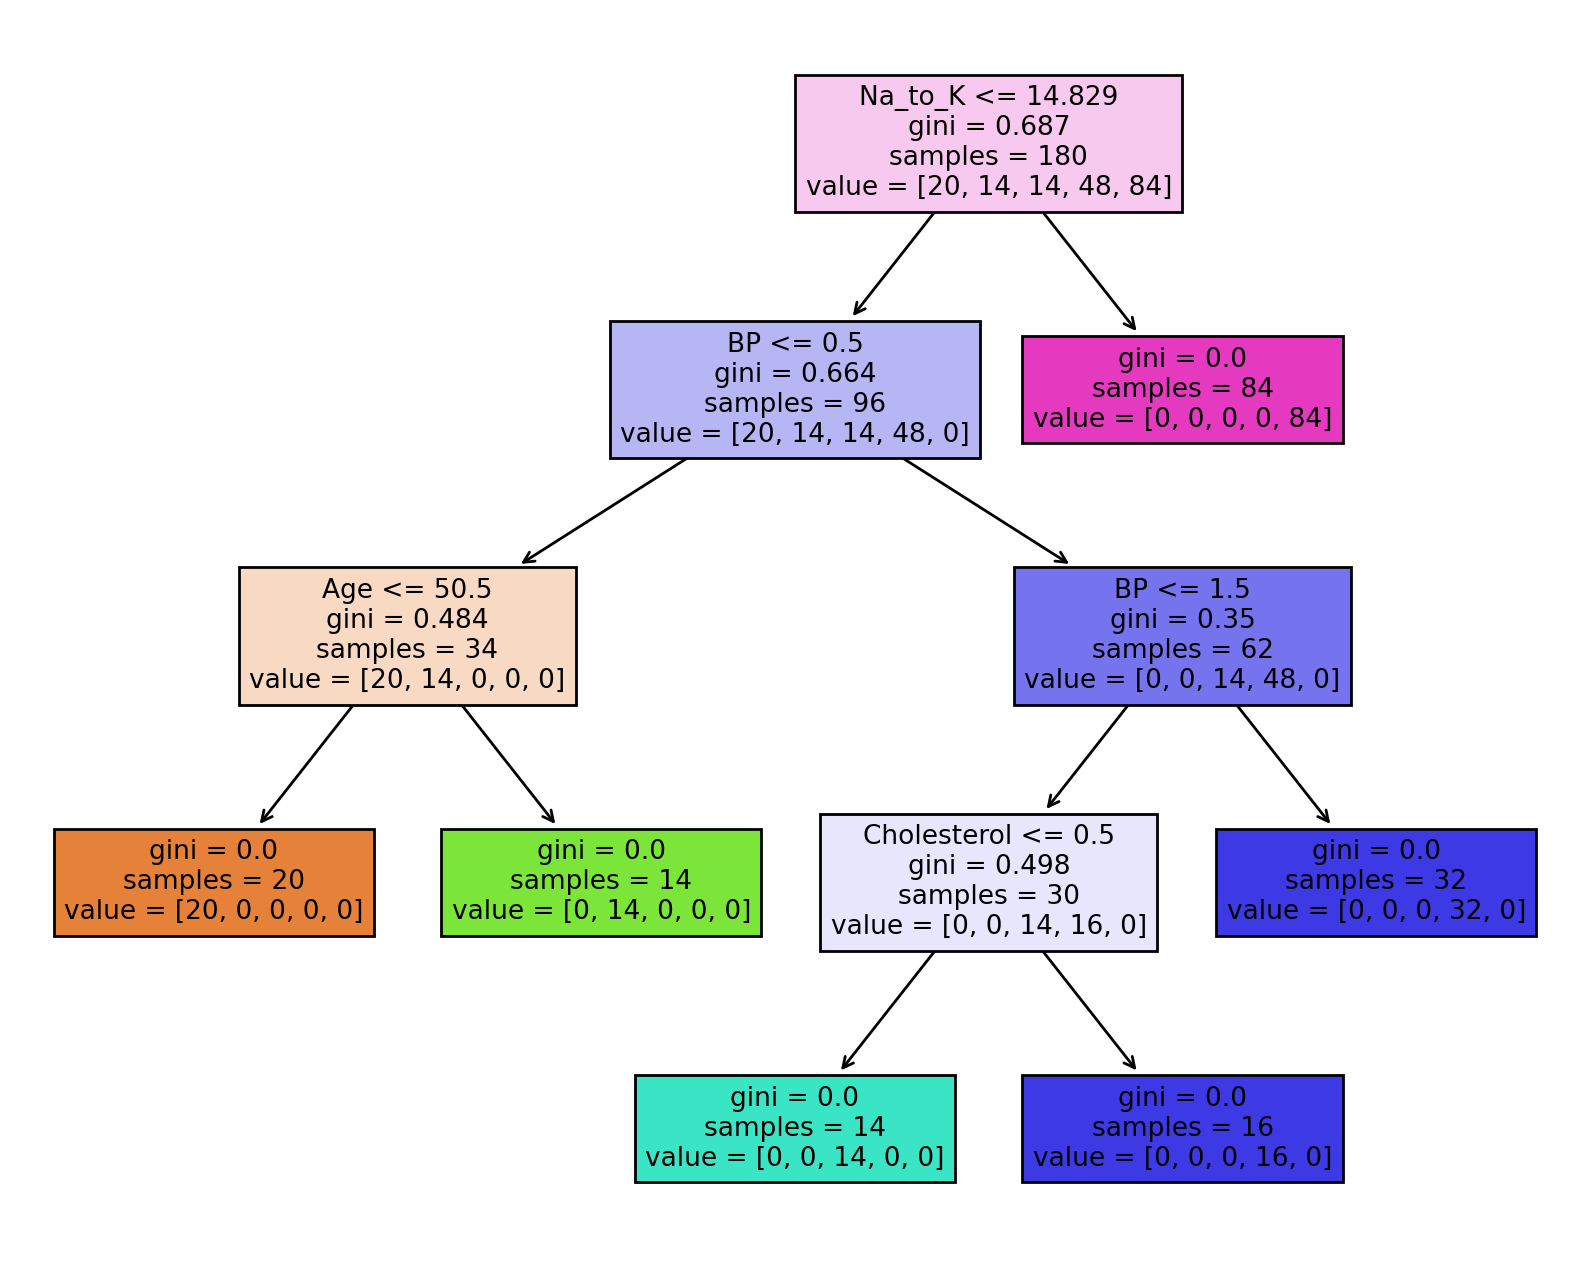

In [16]:
# visualsing👀 the Decision Tree🌳
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 8), dpi=200)
plot_tree(tree_clf0, feature_names=drugs.columns, filled=True);
# Optinal parameters
# feature_names=drugs.columns, filled=True
# filled=True  colors

# <span style="color:salmon">Credit Risk 💷🏦💵</span>
| Feature Name | Description |
| --- | --- |
| person_age | Age |
| person_income | Annual Income |
| person_home_ownership | Home ownership |
| person_emp_length | Employment length (in years) |
| loan_intent | Loan intent |
| loan_grade | Loan grade |
| loan_amnt | Loan amount |
| loan_int_rate | Interest rate |
|<span style="color:red"> loan_status </span> | Loan status (0 is non default 1 is default)|
| loan_percent_income | Percent income |
| cb_person_default_on_file | Historical default |
| cb_preson_cred_hist_length | Credit history length |

In [17]:
# reading the dataset
risk = pd.read_csv('/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv')
risk.head(4)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2


In [18]:
# data size
risk.shape

(32581, 12)

In [19]:
# some info
risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [22]:
# describing the dataset
risk.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [21]:
# describing the dataset object features
risk.describe(include='O')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


In [23]:
risk.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

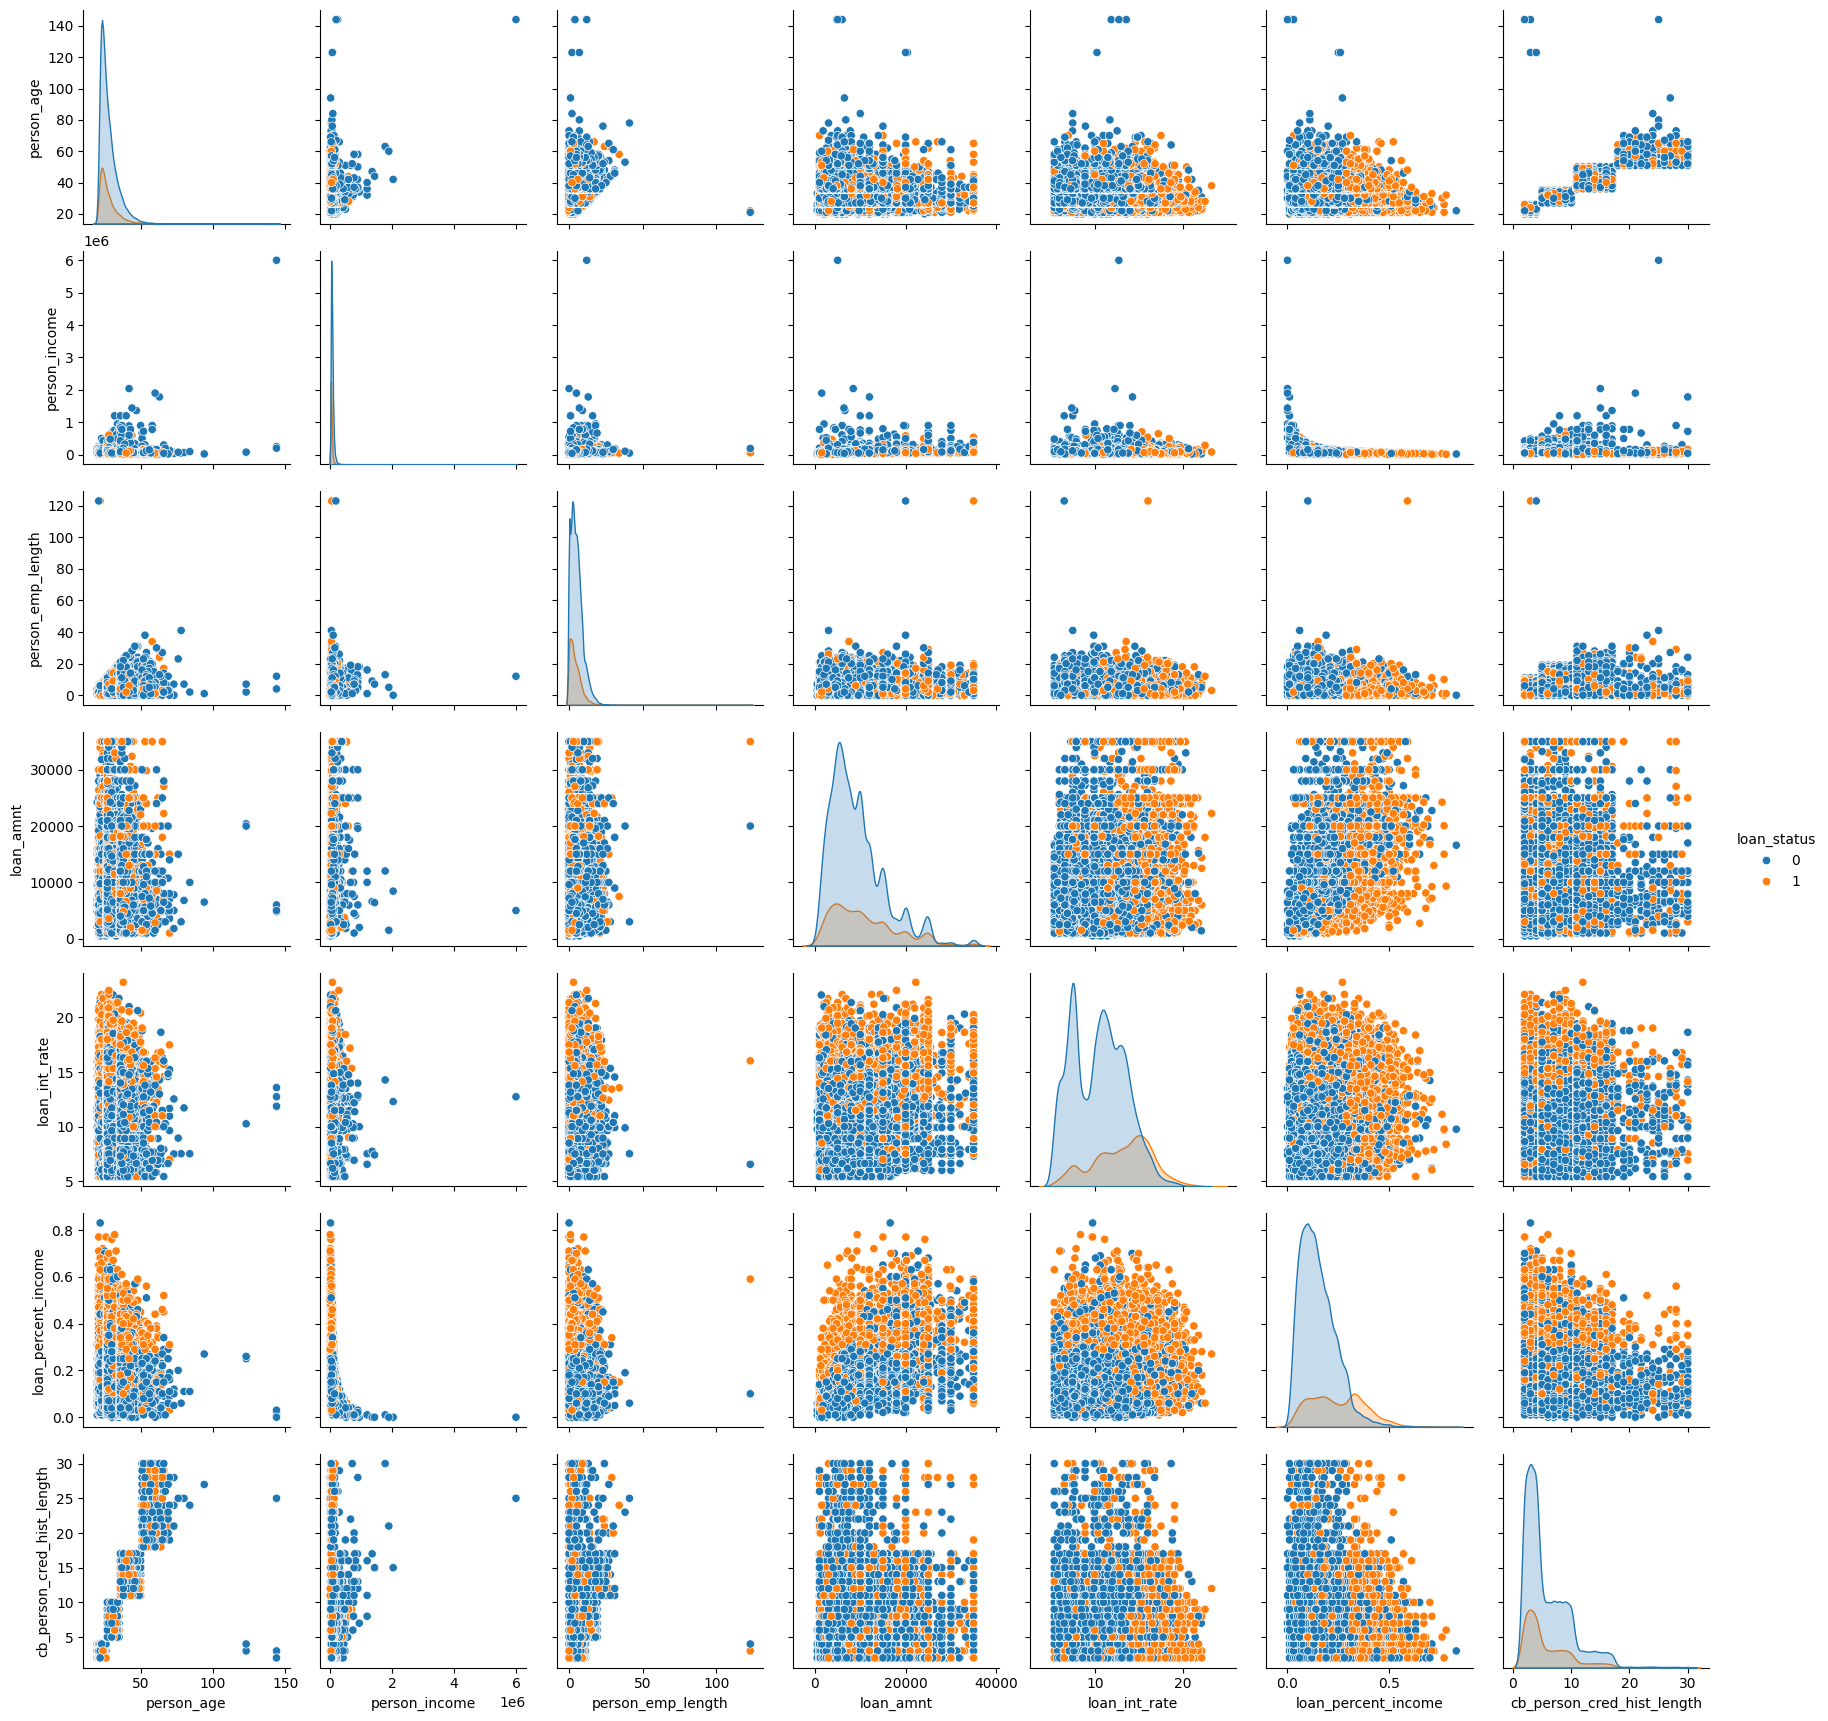

In [26]:
# dealing with the messing data
'''
person_emp_length              895  /32581
loan_int_rate                 3116  /32581
'''
# we need to understand more about these features
sns.pairplot(data=risk, hue='loan_status')

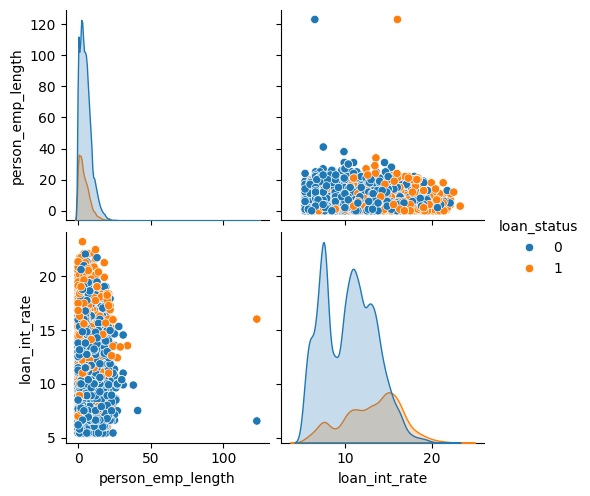

In [27]:
sns.pairplot(data=risk[['person_emp_length', 'loan_int_rate', 'loan_status']], hue='loan_status')

<ipython-input-28-1b7cef9a0cb8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = risk.corr()


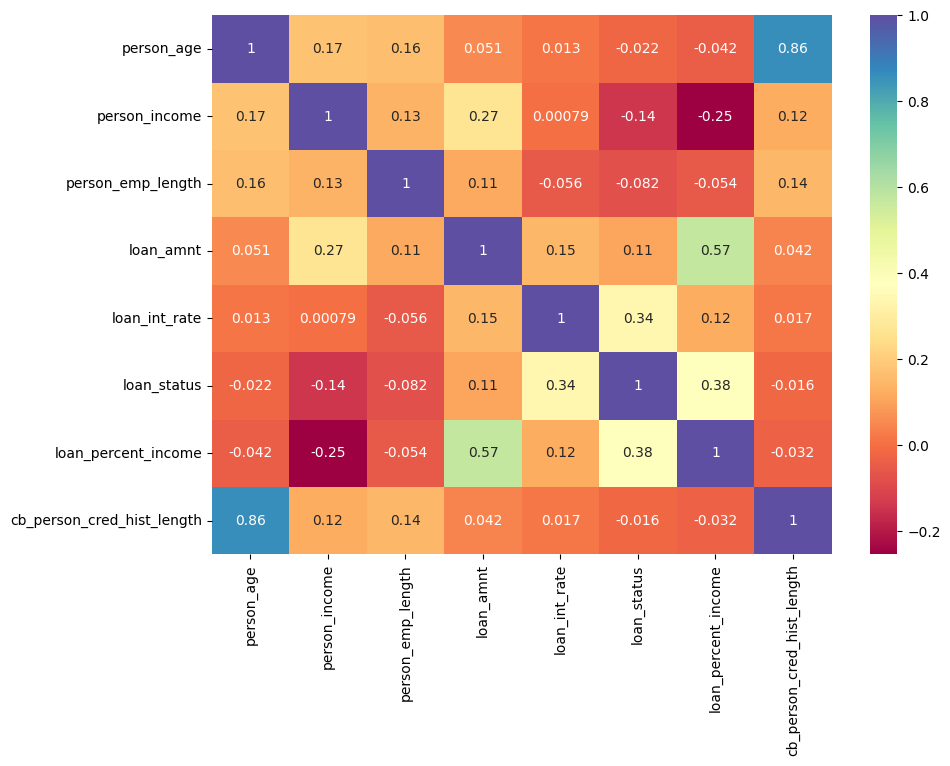

In [28]:
# let's see the correlation
correlation = risk.corr()
plt.figure(figsize=(10,7))
corr_map = sns.heatmap(correlation, annot=True, cmap="Spectral")

'\nnp.ones_like(correlation, dtype=bool) creates a boolean matrix of the same shape as correlation.\nIt sets all elements to True initially because we\'re going to use this as a mask.\n\nnp.triu(...) stands for "upper triangle" and is a NumPy function that zeros out (sets to False) all \nthe elements below the main diagonal of the matrix. In other words, it keeps only the upper triangle intact. \n\n1 2 3\n4 5 6\n7 8 9\n\nApplying np.triu(...) would give you:\n\n1 2 3\n0 5 6\n0 0 9\n'

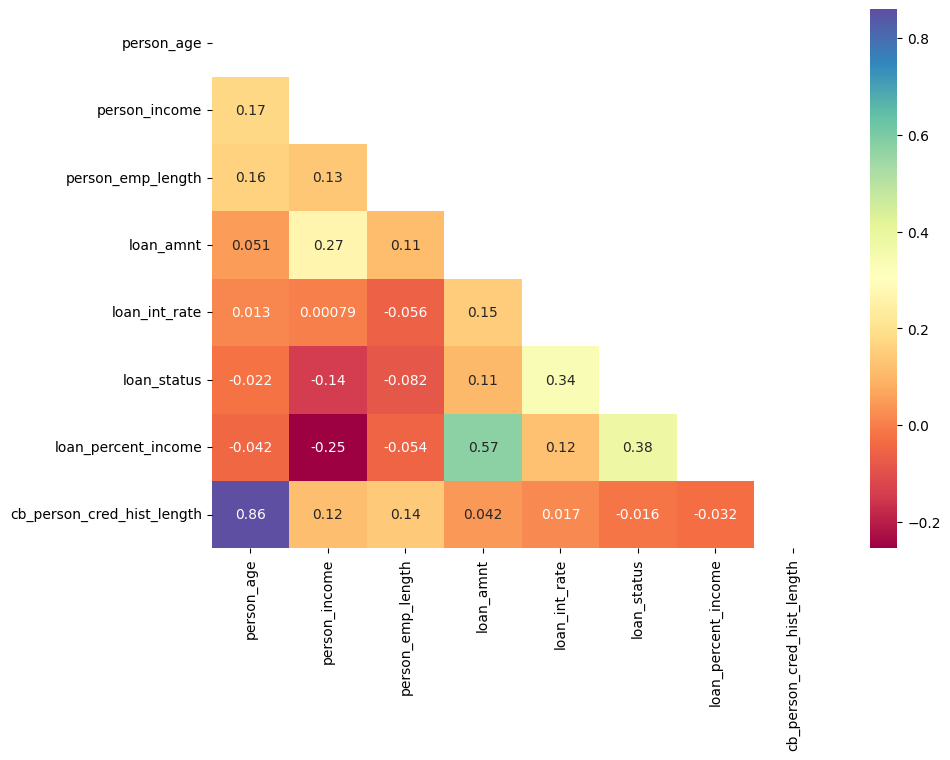

In [29]:
mask_up = np.triu(np.ones_like(correlation, dtype=bool))
plt.figure(figsize=(10,7))
sns.heatmap(correlation, cmap='Spectral', mask=mask_up, annot=True)
'''
np.ones_like(correlation, dtype=bool) creates a boolean matrix of the same shape as correlation.
It sets all elements to True initially because we're going to use this as a mask.

np.triu(...) stands for "upper triangle" and is a NumPy function that zeros out (sets to False) all
the elements below the main diagonal of the matrix. In other words, it keeps only the upper triangle intact.

1 2 3
4 5 6
7 8 9

Applying np.triu(...) would give you:

1 2 3
0 5 6
0 0 9
'''

In [33]:
# dealing with the messing data
'''
person_emp_length              895  /32581
loan_int_rate                 3116  /32581
'''
risk.person_emp_length.value_counts()

0.0      4105
2.0      3849
3.0      3456
5.0      2946
1.0      2915
4.0      2874
6.0      2666
7.0      2196
8.0      1687
9.0      1367
11.0      740
10.0      696
12.0      575
13.0      426
14.0      335
15.0      238
16.0      165
17.0      129
18.0      104
19.0       64
20.0       42
21.0       38
22.0       19
24.0       10
23.0       10
25.0        8
26.0        6
27.0        5
31.0        4
28.0        3
123.0       2
30.0        2
41.0        1
34.0        1
29.0        1
38.0        1
Name: person_emp_length, dtype: int64

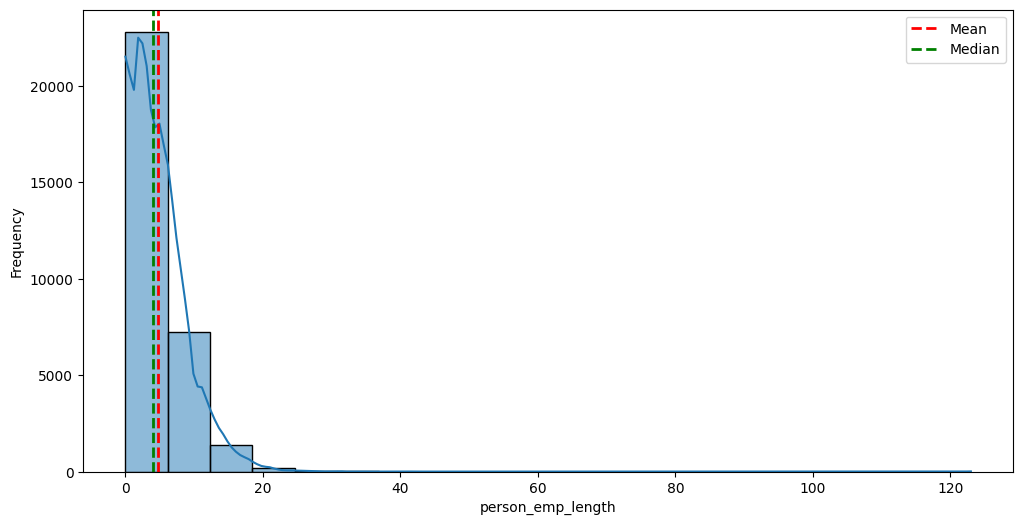

In [32]:
# The Question here "Which to use Mean or Median"?
# Create a histogram using Seaborn
# main code
plt.figure(figsize=(12, 6))
sns.histplot(risk['person_emp_length'].dropna(), bins=20, kde=True)
# --------------------end of the important code -----------------#

# Calculate mean and median
mean_value = risk['person_emp_length'].mean()
median_value = risk['person_emp_length'].median()

# plt.figure(figsize=(10, 7))
# Add vertical lines for mean and median
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label='Median')

# Add labels and legend
plt.xlabel('person_emp_length')
plt.ylabel('Frequency')
plt.legend()
# it won't make a difference in this case
# use median if the data  skewed or contains outliers,
# The median is less sensitive to extreme values (outliers) than the mean.
# Choose the mean if the distribution is approximately symmetric

In [34]:
# filing using the median
risk['person_emp_length'].fillna(risk['person_emp_length'].median(), inplace=True)

In [35]:
# checking
risk.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

11.011694892245036 10.99


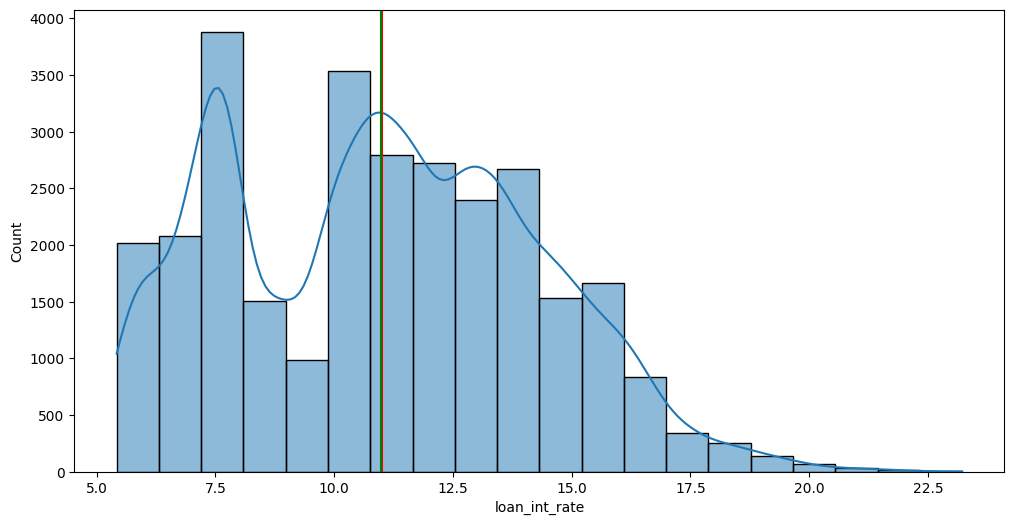

In [36]:
# loan interset rate
plt.figure(figsize=(12, 6))
sns.histplot(risk['loan_int_rate'].dropna(), bins=20, kde=True)

# ploting the mean and median
mean, median = risk['loan_int_rate'].mean(), risk['loan_int_rate'].median()

plt.axvline(mean, color='red')
plt.axvline(median, color ='green')

print(mean, median)
# almost the same

In [37]:
# filling with the mean
risk['loan_int_rate'].fillna(risk['loan_int_rate'].mean(), inplace=True)

In [40]:
risk.isnull().sum()
# perfect ✅

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [39]:
# now let's encode the data
# What columns need encoding
risk.select_dtypes(include='O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   person_home_ownership      32581 non-null  object
 1   loan_intent                32581 non-null  object
 2   loan_grade                 32581 non-null  object
 3   cb_person_default_on_file  32581 non-null  object
dtypes: object(4)
memory usage: 1018.3+ KB


In [41]:
cols = risk.select_dtypes(include='O').columns
cols

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [42]:
for col in cols:
    print("="*50, col)
    print(risk[col].value_counts())


================================================== person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64
================================================== loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64
================================================== loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64
================================================== cb_person_default_on_file
N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64


In [43]:
# let's label encode this features
lenc = LabelEncoder()

# loop over each column with the type 'object' => string
for col in cols:
    # fit_transform
    risk[col] = lenc.fit_transform(risk[col])

# displaying
risk

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,1.0,4,2,5800,13.16,0,0.11,0,30
32577,54,120000,0,4.0,4,0,17625,7.49,0,0.15,0,19
32578,65,76000,3,3.0,2,1,35000,10.99,1,0.46,0,28
32579,56,150000,0,5.0,4,1,15000,11.48,0,0.10,0,26


In [44]:
risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  int64  
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  int64  
 5   loan_grade                  32581 non-null  int64  
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  int64  
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 3.0 MB


In [45]:
# 🌳 very intersting thing about the tree it doesn't need scaling the data
# the alogrithms that need sclaing mostly depend on distance or using variance
# but here the true work based on the purity of a node
# that is why also I prefered to use label encoding
# it's perfect with using classes and sepreating them
# and OneHotEncoding make more columns which mean larger trees🌴🌴
# Let's Split the data to => X features (input for the model) , y the target (output)
X = risk.drop(columns='loan_status')
y = risk['loan_status']

In [46]:
# Spliting the data into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


In [47]:
# let's fit the tree
tree_clf1 = DTC()

# fitting the model
tree_clf1.fit(X_train, y_train)


DecisionTreeClassifier()

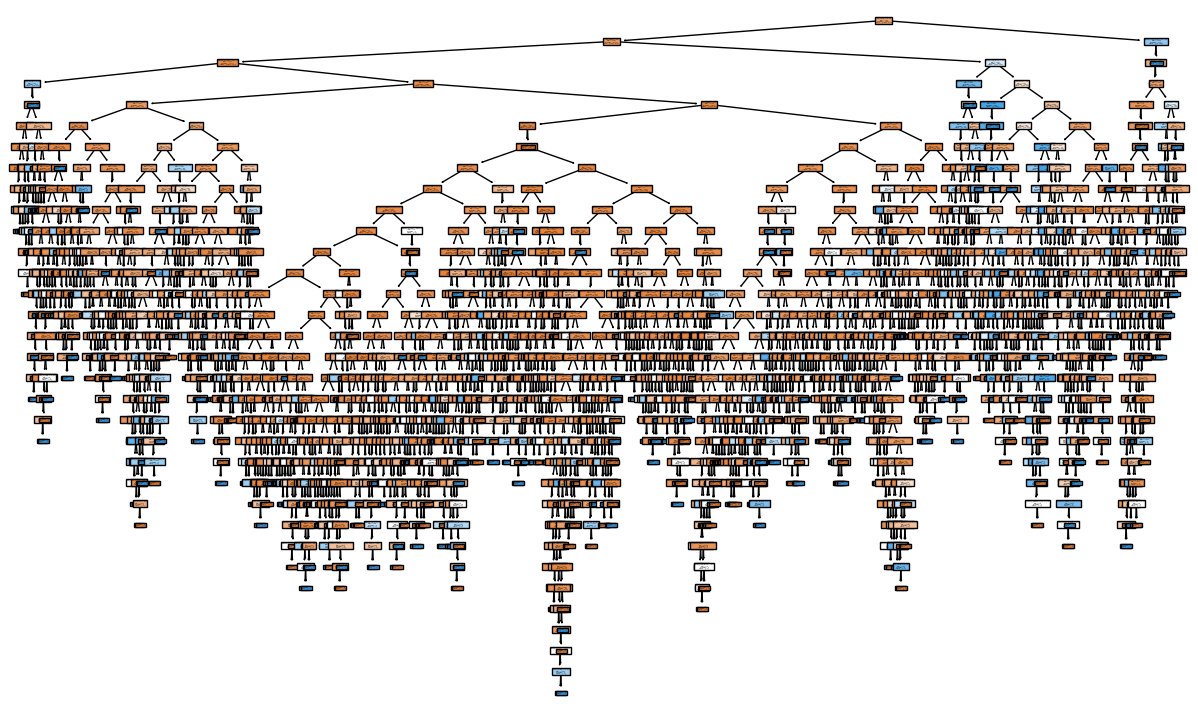

In [48]:
plt.figure(figsize=(15, 9))
plot_tree(tree_clf1, feature_names=risk.columns, filled=True);

In [ ]:
# depth of the tree
tree_clf1.get_depth()

In [ ]:
# n of leaves
tree_clf1.get_n_leaves()

In [ ]:
# features ✨
features = tree_clf1.feature_names_in_
features

In [ ]:
# features importance ✨
importance = tree_clf1.feature_importances_
importance

In [ ]:
plt.figure(figsize=(10,7))
plt.bar(features, importance)
plt.title('Feature Importance')
plt.xticks(rotation=90);

In [ ]:
# parameter of the model
tree_clf1.get_params()

In [ ]:
# getting the score✨
print(f"Training accuracy : {tree_clf1.score(X_train, y_train)}")
print(f"Test accuracy {tree_clf1.score(X_test, y_test)}")

## <span style="color: red">Post Pruning✂️🌳 </span>

- Post-pruning is a technique where the decision tree is allowed to grow to its maximum depth and then parts of the tree are removed to prevent overfitting.
- Subtrees of the full tree are evaluated using criteria such as mean squared error (MSE) for regression trees or classification error for classification trees.
- Post pruning involves converting leaves to nodes and removing subtrees based on the evaluation criteria.
The challenge with post pruning is that evaluating every branch of a large tree can be computationally expensive.

In [ ]:
# train the decision tree model with post-pruning
path = tree_clf1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
models = []
for i, ccp_alpha in enumerate(ccp_alphas):
    model = DTC(random_state=42, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)
    print(f"Accuracy with pruning #{i+1}:", model.score(X_test, y_test))
    models.append(model)

In [ ]:
# visualize the pruned decision tree
choosen_models = [0, 50, 100, 200, 300, 400, 500, 600, 620, 680, 682]
for m in choosen_models:
    plt.figure(figsize=(30, 5))
    print(f"Model {m}")
    plot_tree(models[m], filled=True)
    plt.show()

In [ ]:
# this model is overfitting
# doing well on the train (memorizing things not learning)
# to solve this problem we have to make the model more simplier
# by cuting or limiting the size of the tree🌳
# Pruning (post, pre)
path = tree_clf1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in models]
test_scores = [clf.score(X_test, y_test) for clf in models]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# let's build our fincal model
# you can try diferent values to cpp_alpha
# try 0.0001
# try 0.1 and other values as you like
tree_clf2 = DTC(ccp_alpha=0.001)

# fitting the model
tree_clf2.fit(X_train, y_train)

# train acc, test acc
tree_clf2.score(X_train, y_train), tree_clf2.score(X_test, y_test)

In [ ]:
# ploting the tree
# train , test
# (0.9208980092957993, 0.9176470588235294)
plt.figure(figsize=(15, 7), dpi=250)
plot_tree(tree_clf2, feature_names=risk.columns, filled=True);

# <span style="color : salmon">Cross Validation </span>
![image-2.png](attachment:image-2.png)

![image-3.png](attachment:image-3.png)

In [ ]:
# using cross validation
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation (you can change the number of folds as needed)
cv_scores = cross_val_score(tree_clf1, X_train, y_train, cv=5)


# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


In [ ]:
# Perform 5-fold cross-validation (you can change the number of folds as needed)
cv_scores = cross_val_score(tree_clf2, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

## <span style="color: red">Pre Pruning🛑🌳 </span>

**[RECALL](https://hossam-ahmed.notion.site/Entropy-Information-Gain-Gini-Index-1fbaf1424fe8495f91b68d11a071a930?pvs=4)**

- Pre-pruning is a technique that involves stopping the growth of the decision tree early to prevent overfitting.
- Hyperparameters like max_depth, min_samples_leaf, and min_samples_split can be tuned to control the growth of the tree.
- Sklearn's DecisionTreeClassifier offers these hyperparameters for pre-pruning.
- The GridSearchCV technique in Sklearn can be used to find the optimal hyperparameter values for the decision tree model.
- ***However, early stopping may face a challenge known as the "horizon" problem, where potentially fruitful splits are missed by stopping the tree's growth too early.***


1. **`max_depth`**: This parameter sets the maximum depth of the tree. If you specify a positive integer value, the tree will stop growing when it reaches this depth. Limiting the depth can prevent the tree from becoming overly complex.
2. **`min_samples_split`**: This parameter sets the minimum number of samples required to split an internal node. If a node has fewer samples than this value, it won't be split further. Setting it to a larger value can prevent the tree from creating small, isolated branches.
3. **`min_samples_leaf`**: This parameter sets the minimum number of samples required to be in a leaf node. If a leaf node would have fewer samples than this value, it won't be created. It helps in preventing overly fine-grained splits.
4. **`min_weight_fraction_leaf`**: Similar to **`min_samples_leaf`**, but expressed as a fraction of the total number of weighted samples. This is useful when samples have different weights.
5. **`max_leaf_nodes`**: This parameter limits the total number of leaf nodes in the tree. If you specify this value, the tree will stop growing once the limit is reached.
6. **`min_impurity_decrease`**: This parameter sets a threshold for impurity decrease. A split will only be made if it decreases the impurity (e.g., Gini impurity or entropy) by at least this threshold. It allows for splits that significantly improve the node purity.
7. **`ccp_alpha` (Cost Complexity Pruning)**(✂️🌳 Post): This is a regularization parameter for controlling the complexity of the tree. It represents the complexity parameter used in the minimal cost-complexity pruning algorithm. Larger values of **`ccp_alpha`** increase the amount of pruning, resulting in simpler trees

In [ ]:
DTC?

In [30]:
tree_clf3 = DTC(max_depth=10)
# fiting the tree
tree_clf3.fit(X_train, y_train)
# cross val score
cv_scores = cross_val_score(tree_clf3, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

# test score
print("Test Score", tree_clf3.score(X_test, y_test))


NameError: name 'cross_val_score' is not defined

In [ ]:
# accuracy report
y_pred = tree_clf3.predict(X_test)
print(classification_report(y_test, y_pred))

# <span style="color:skyblue"> Metrics </span>

1. **Accuracy (ACC)**:
    - Formula: (Number of Correct Predictions) / (Total Number of Predictions)
    - Use Case: Accuracy is suitable for balanced datasets where all classes have similar sizes. It provides an overall measure of the model's correctness in classification.
2. **Precision (Positive Predictive Value)**:
    - Formula: (True Positives) / (True Positives + False Positives)
    - Use Case: Precision is useful when you want to minimize false positive errors. It's important in applications where the cost of false positives is high.
3. **Recall (Sensitivity, True Positive Rate)**:
    - Formula: (True Positives) / (True Positives + False Negatives)
    - Use Case: Recall is important when you want to minimize false negative errors. It's relevant in applications where failing to detect positive instances is costly.
4. **F1 Score**:
    - Formula: 2 * (Precision * Recall) / (Precision + Recall)
    - Use Case: The F1 score is the harmonic mean of precision and recall. It's a balanced metric that considers both false positives and false negatives. It's useful when you want to strike a balance between precision and recall.

>https://en.wikipedia.org/wiki/Precision_and_recall

![Alt text](image-1.png)

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size as needed
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=0.5, cbar=False, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

1. **Medical Diagnosis - Disease Detection:**
- **Scenario**: Detecting a rare and highly contagious disease.
- **Preference**: Recall.
- **Explanation**: In this case, minimizing false negatives (failing to detect a true positive case, i.e., a person with the disease) is critical because missing even a single case can lead to widespread transmission. Emphasizing recall ensures that the disease is detected as early as possible, even if it means accepting a higher number of false positives.

**2. Email Spam Detection**:

- **Scenario**: Identifying spam emails.
- **Preference**: Precision.
- **Explanation**: In email spam detection, you want to minimize false positives (classifying legitimate emails as spam) because it can lead to important emails being missed or user inconvenience. Emphasizing precision ensures that when an email is marked as spam, it is highly likely to be spam.

**3. Fraud Detection - Credit Card Transactions**:

- **Scenario**: Identifying fraudulent credit card transactions.
- **Preference**: Precision.
- **Explanation**: Minimizing false positives (flagging legitimate transactions as fraudulent) is important to prevent disruptions for customers. Emphasizing precision ensures that when a transaction is flagged as fraudulent, it is highly likely to be fraudulent.

**4. Information Retrieval - Search Engine**:

- **Scenario**: Retrieving relevant documents in a search engine.
- **Preference**: Recall.
- **Explanation**: In information retrieval, the goal is to retrieve all relevant documents (maximize recall) to ensure users find what they're looking for. Missing relevant documents (false negatives) is less acceptable, even if it means returning some less relevant documents (false positives).

**5. Quality Control - Manufacturing**:

- **Scenario**: Identifying defective products on a production line.
- **Preference**: Recall.
- **Explanation**: In manufacturing, you want to ensure that all defective products are identified (maximize recall) to prevent faulty products from reaching consumers. Missing a defective product (false negative) can have safety and quality implications.

**6. Sentiment Analysis - Customer Reviews**:

- **Scenario**: Determining the sentiment (positive/negative) of customer reviews.
- **Preference**: Precision.
- **Explanation**: In sentiment analysis, you may prioritize precision to ensure that when a review is classified as positive or negative, it is highly likely to be correct. Minimizing false positives helps maintain the accuracy of sentiment analysis.

# <span style="color: skyblue">GRID SEARCH</span>

In [ ]:
from sklearn.model_selection import GridSearchCV

tree_clf4 = DTC()

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(tree_clf4, param_grid, cv=5, scoring='accuracy', n_jobs=-1)


In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
best_tree = grid_search.best_estimator_

In [ ]:
best_tree

In [ ]:
print(f"train score {best_tree.score(X_train, y_train)}")
print(f"test score {best_tree.score(X_test, y_test)}")

In [ ]:
pd.DataFrame(grid_search.cv_results_).sample(5)